# Executive Orders Analysis

This notebook contains code for cleaning and analyzing executive orders. It includes k-means clustering, topic modeling, and word/document embeddings.

In [1]:
import lucem_illud as lucem_illud_2020 #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [5]:
cd ..

/Users/lilygrier/git/ContentAnalysisPresidentialRhetoric


In [6]:
from utils.utils import *
from topic_modeling.PrepareText import PrepareText


In [129]:

import lucem_illud 
from utils.utils import *
from topic_modeling.TopicModeling import TopicModels as LDA_barrosoluquer
from topic_modeling.PrepareText import PrepareText
%load_ext autoreload
%autoreload 2

import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import gensim
import numpy as np 
import pandas as pandas
import matplotlib.pyplot as plt 
import matplotlib.cm 
import seaborn as sns

%matplotlib inline

import itertools
import re
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
filepath = '../data/full_exec_orders_text.csv'

In [17]:
pd.read_csv(filepath)

,Unnamed: 0,Unnamed: 0.1,citation,document_number,end_page,html_url,pdf_url,type,subtype,publication_date,signing_date,start_page,title,disposition_notes,executive_order_number,president,order_text
0,0,0.0,82 FR 8115,2017-01623,8129,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/23/2017,01/17/2017,8115,"Amending the Civil Service Rules, Executive Or...","Amends: EO 13467, June 30, 2008; EO 13488, Jan...",13764.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
1,1,1.0,82 FR 7619,2017-01487,7620,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7619,Providing an Order of Succession Within the De...,"Revokes: EO 13557, November 4, 2010\nRevoked b...",13762.0,barack_obama,"\n\n\nExecutive Order 13762 of January 13, 201..."
2,2,2.0,82 FR 7621,2017-01489,7622,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/19/2017,01/13/2017,7621,Providing an Order of Succession Within the En...,"Revokes: EO 13737, August 12, 2016",13763.0,barack_obama,"\n\n\nExecutive Order 13763 of January 13, 201..."
3,3,3.0,82 FR 5331,2017-01197,5333,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/18/2017,01/13/2017,5331,Recognizing Positive Actions by the Government...,"Revokes in part: EO 13067, November 3, 1997\nR...",13761.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
4,4,4.0,82 FR 5321,2017-01164,5322,https://www.federalregister.gov/documents/2017...,https://www.govinfo.gov/content/pkg/FR-2017-01...,Presidential Document,Executive Order,01/17/2017,01/12/2017,5321,Amending Executive Order 11016 To Update Eligi...,"Amends: EO 11016, April 25, 1962",13758.0,barack_obama,\n\nTitle 3—\nThe President\n\nExecutive Order...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1071,NaN,86 FR 7029,2021-01762,7035,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7029,Ethics Commitments by Executive Branch Personnel,NaN,13989.0,joe_biden,\n\nTitle 3—\nThe President\n\nExecutive Order...
1070,1072,NaN,86 FR 7037,2021-01765,7043,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7037,Protecting Public Health and the Environment a...,NaN,13990.0,joe_biden,"\n\n\nExecutive Order 13990 of January 20, 202..."
1071,1073,NaN,86 FR 7045,2021-01766,7048,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7045,Protecting the Federal Workforce and Requiring...,NaN,13991.0,joe_biden,"\n\n\nExecutive Order 13991 of January 20, 202..."
1072,1074,NaN,86 FR 7049,2021-01767,7050,https://www.federalregister.gov/documents/2021...,https://www.govinfo.gov/content/pkg/FR-2021-01...,Presidential Document,Executive Order,01/25/2021,01/20/2021,7049,Revocation of Certain Executive Orders Concern...,NaN,13992.0,joe_biden,"\n\n\nExecutive Order 13992 of January 20, 202..."


In [20]:
exec_orders = pd.read_csv(filepath)

I first did some exploratory k-means clustering using TF-IDF vectors as features.

In [22]:
targetDF = exec_orders
textColumn = 'order_text'
numCategories = 5
numClusters = 5

In [23]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.4, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 council
 committee
 health
 board
 commission
 service
 advisory
 defense
 programs
 report


Cluster 1:
 register
 presidential
 documents
 page
 volume
 1996
 1997
 1998
 1995
 tuesday


Cluster 2:
 property
 blocked
 interests
 ieepa
 persons
 treasury
 50
 emergency
 entity
 iran


Cluster 3:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 judges


Cluster 4:
 task
 force
 attorney
 chair
 health
 development
 environmental
 recommendations
 report
 local




In [24]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.138
Completeness: 0.208
V-measure: 0.166
Adjusted Rand Score: 0.068


In [25]:
# tf idf vectorizing
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.3, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
TFVects = TFVectorizer.fit_transform(targetDF[textColumn])

# run k means
KM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
KM.fit(TFVects)


terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = KM.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 register
 documents
 page
 volume
 1997
 1996
 1998
 1995
 tuesday
 97


Cluster 1:
 property
 blocked
 interests
 ieepa
 treasury
 persons
 50
 emergency
 entity
 iran


Cluster 2:
 december
 board
 inserting
 striking
 2001
 emergency
 assistant
 succession
 2003
 immunities


Cluster 3:
 schedule
 pay
 hereto
 hereof
 rates
 attached
 basic
 schedules
 payments
 37


Cluster 4:
 task
 committee
 force
 commission
 advisory
 programs
 american
 education
 local
 chair




In [26]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(exec_orders['president'], KM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(exec_orders['president'], KM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(exec_orders['president'], KM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(exec_orders['president'], KM.labels_)))

For our clusters:
Homogeneity: 0.174
Completeness: 0.201
V-measure: 0.187
Adjusted Rand Score: 0.093


In [27]:
# perform PCA and visualize
PCA = sklearn.decomposition.PCA(n_components = 2).fit(TFVects.toarray())
reducedPCA_data = PCA.transform(TFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in KM.labels_]

In [28]:
components = PCA.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

In [29]:
colordict = {
'barack_obama': 'red',
'george_w_bush': 'orange',
'william_j_clinton': 'green',
'donald_trump': 'blue',
'joe_biden': 'purple'
    }
colors = [colordict[c] for c in exec_orders['president']]
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('barack_obama', 'red'), ('george_w_bush', 'orange'), ('william_j_clinton', 'green'), ('donald_trump', 'blue'), ('joe_biden', 'purple')])


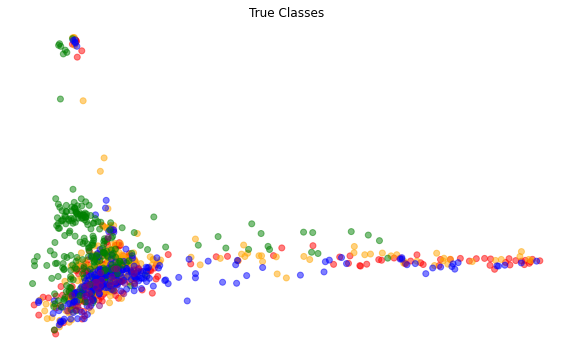

In [30]:

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

The clustering here suggests the documents do not "naturally" group by president. I will instead explore other featuers that might inform our clusters.

## Text Cleaning

I attempted to parse out meaning from the rigid structure of the executive orders by filtering out Roman numerals, section headings, and some common words. I then tokenized and normalized the text. NOTE: I created two sets documents, one filtered and one unfiltered, and performed analyses on both.

In [39]:
def clean_raw_text(text):
    '''
    Cleans executive order text by getting rid of section headings, 
    roman numeral and alphanumeric bulleting.
    '''
    text = re.sub(r'\([xiv]+\)', '', text)
    text = re.sub(r'\([A-Za-z]\)', '', text)
    text = re.sub(r'Sec. \d+(.\d)?', '', text)
    return text

In [161]:
def filter_text(text):
    '''
    Removes common words from executive orders as well as section headings,
    roman numeral, and alphanumeric bulleting.
    '''
    REMOVE_LIST = ['department', 'order', 'shall', 'executive', 'agency', 
                  'federal', 'law', 'act', 'amend', 'president', 'presidential',
                 'state', 'secretary', 'comittee', 'council', 'agency', 
                'amendment', 'section']
    remove = '|'.join(REMOVE_LIST)
    regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)
    text = re.sub(regex, '', text)
    text = re.sub(r'\([xiv]+\)', '', text)
    text = re.sub(r'\([A-Za-z]\)', '', text)
    text = re.sub(r'Sec. \d+(.\d)?', '', text)
    text = re.sub(r'department', '', text)
    text = re.sub(r'shall', '', text)
    text = re.sub(r'order', '', text)
    return text

In [41]:
exec_orders['clean_text'] = exec_orders['order_text'].apply(lambda x: clean_raw_text(x))

In [162]:
exec_orders['filtered_text'] = exec_orders['order_text'].apply(lambda x: filter_text(x))

In [42]:

#Apply our functions
exec_orders['tokenized_text'] = exec_orders['clean_text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
exec_orders['normalized_tokens'] = exec_orders['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [163]:
#Apply our functions
exec_orders['tokenized_text_filter'] = exec_orders['filtered_text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
exec_orders['normalized_tokens_filter'] = exec_orders['tokenized_text_filter'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [48]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lilygrier/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lilygrier/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [49]:
orders_docs = [doc for doc in exec_orders.clean_text.values]
# clean docs and prepare for LDA
clean_orders = PrepareText(orders_docs)

In [164]:
filtered_docs = [doc for doc in exec_orders.filtered_text.values]
# clean docs and prepare for LDA
filtered_orders = PrepareText(filtered_docs)

## LDA and Topic Modeling

I then performed topic modeling on both the filtered and unfiltered models and created visualizations of several different model specifications.

In [165]:
lda_filtered_orders = LDA_barrosoluquer(filtered_orders)

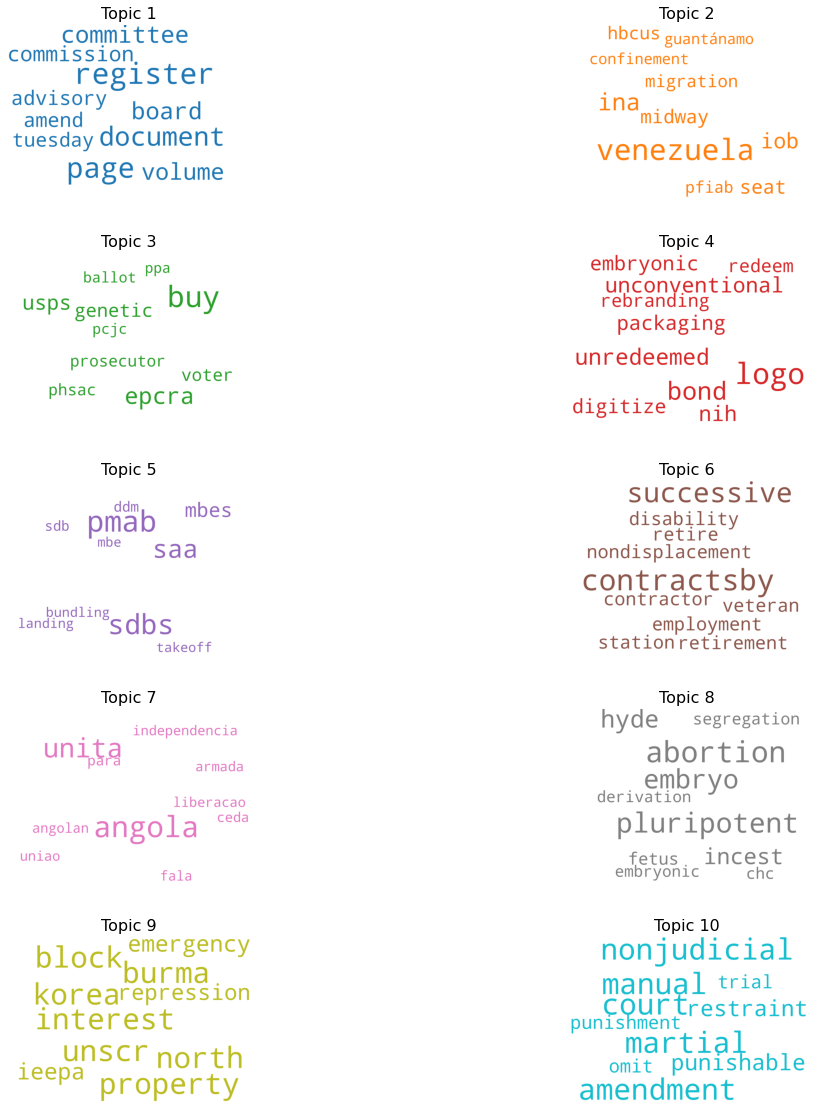

In [166]:
lda_orders_10 = lda_filtered_orders.applyLDA(numtopics=10)
lda_filtered_orders.generate_topic_wordcloud(lda_orders_10)

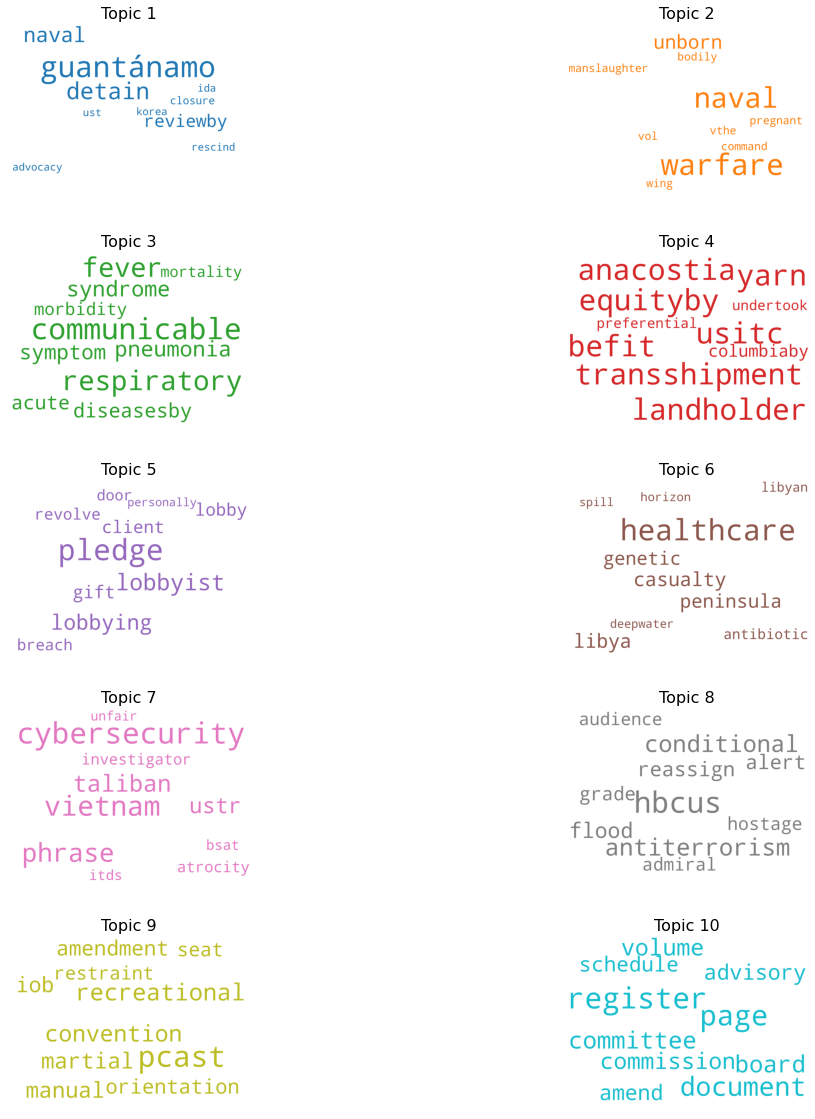

In [167]:
lda_orders_15 = lda_filtered_orders.applyLDA(numtopics=15)
lda_filtered_orders.generate_topic_wordcloud(lda_orders_15)

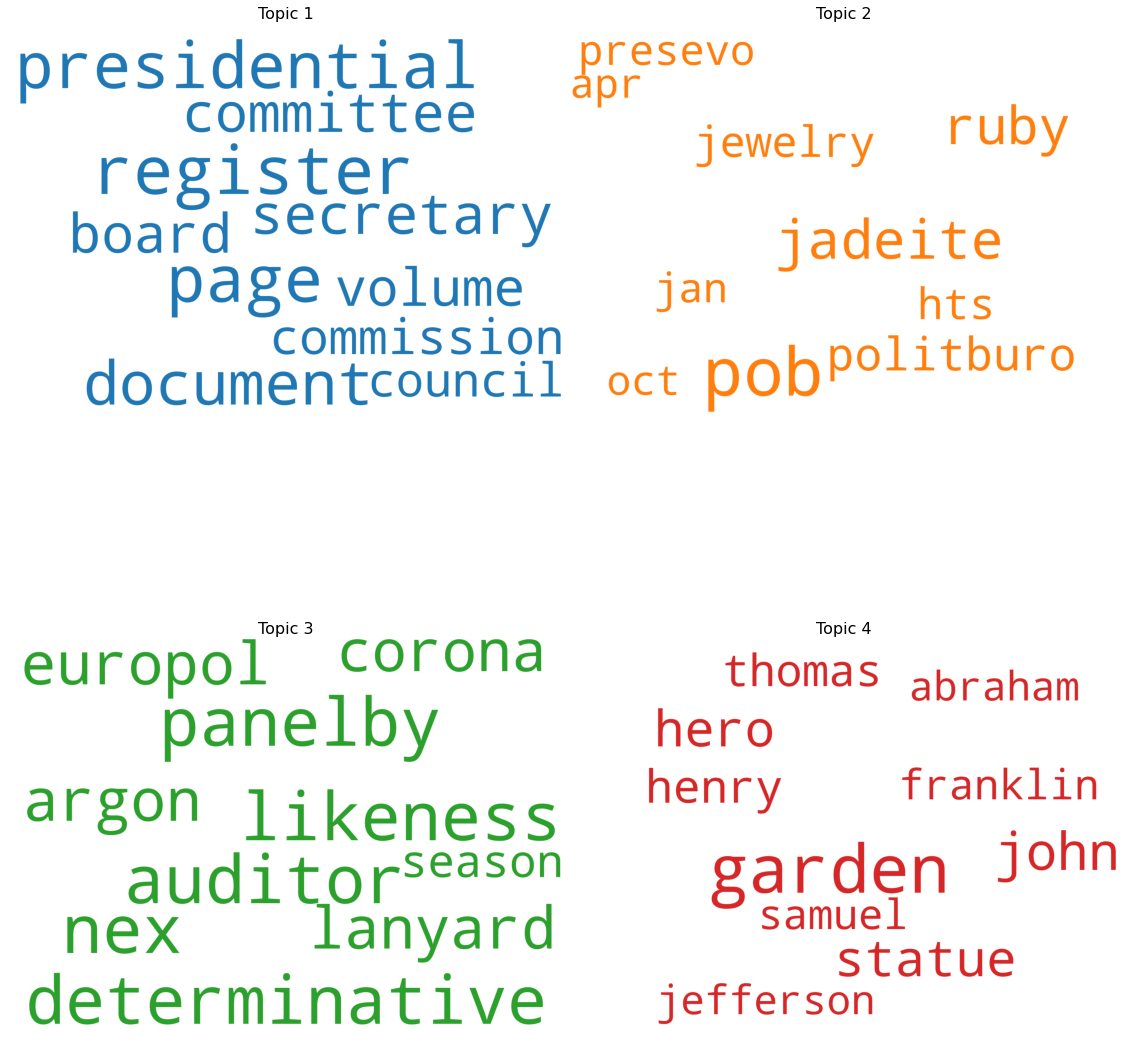

In [52]:
# Use TopicModels class to apply LDA use k = 4 initially
lda_orders = LDA_barrosoluquer(clean_orders)
lda_orders_6 = lda_orders.applyLDA(numtopics=4)
lda_orders.generate_topic_wordcloud(lda_orders_6)

In [53]:
# Run grid serach by varying hyperparams
params_grid = {
     'alpha_range':[.6,.8, 1],
     'beta_range':[.6,.8, 1],
     'num_topics_range': [4, 6, 8, 10,15,20]}
results_df = lda_orders.grid_search(params_grid)
results_df

,Models,alpha,beta,num_topics,coherence_score
58,"LdaModel(num_terms=10227, num_topics=15, decay...",1,0.8,15,0.529558
65,"LdaModel(num_terms=10227, num_topics=20, decay...",1,1,20,0.515750
89,"LdaModel(num_terms=10227, num_topics=20, decay...",asymmetric,1,20,0.503341
11,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.8,20,0.492387
41,"LdaModel(num_terms=10227, num_topics=20, decay...",0.8,1,20,0.483676
...,...,...,...,...,...
12,"LdaModel(num_terms=10227, num_topics=4, decay=...",0.6,1,4,0.372674
84,"LdaModel(num_terms=10227, num_topics=4, decay=...",asymmetric,1,4,0.371831
56,"LdaModel(num_terms=10227, num_topics=8, decay=...",1,0.8,8,0.368773
48,"LdaModel(num_terms=10227, num_topics=4, decay=...",1,0.6,4,0.364885


In [169]:
# Run grid serach by varying hyperparams
params_grid = {
     'alpha_range':[.6,.8, 1],
     'beta_range':[.6,.8, 1],
     'num_topics_range': [4, 6, 8, 10,15,20]}
results_df_filtered = lda_filtered_orders.grid_search(params_grid)
results_df_filtered

,Models,alpha,beta,num_topics,coherence_score
41,"LdaModel(num_terms=10214, num_topics=20, decay...",0.8,1,20,0.541976
17,"LdaModel(num_terms=10214, num_topics=20, decay...",0.6,1,20,0.522334
59,"LdaModel(num_terms=10214, num_topics=20, decay...",1,0.8,20,0.521750
80,"LdaModel(num_terms=10214, num_topics=8, decay=...",asymmetric,0.8,8,0.505293
11,"LdaModel(num_terms=10214, num_topics=20, decay...",0.6,0.8,20,0.501721
...,...,...,...,...,...
18,"LdaModel(num_terms=10214, num_topics=4, decay=...",0.6,symmetric,4,0.398297
60,"LdaModel(num_terms=10214, num_topics=4, decay=...",1,1,4,0.396806
78,"LdaModel(num_terms=10214, num_topics=4, decay=...",asymmetric,0.8,4,0.395553
54,"LdaModel(num_terms=10214, num_topics=4, decay=...",1,0.8,4,0.395151


In [180]:
results_df_filtered.iloc[3, 0]

In [150]:
pd.set_option('display.max_columns', None)

In [155]:
results_df.head(15)

,Models,alpha,beta,num_topics,coherence_score
58,"LdaModel(num_terms=10227, num_topics=15, decay...",1,0.8,15,0.529558
65,"LdaModel(num_terms=10227, num_topics=20, decay...",1,1,20,0.515750
89,"LdaModel(num_terms=10227, num_topics=20, decay...",asymmetric,1,20,0.503341
11,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.8,20,0.492387
41,"LdaModel(num_terms=10227, num_topics=20, decay...",0.8,1,20,0.483676
53,"LdaModel(num_terms=10227, num_topics=20, decay...",1,0.6,20,0.479098
5,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.6,20,0.469472
40,"LdaModel(num_terms=10227, num_topics=15, decay...",0.8,1,15,0.466687
16,"LdaModel(num_terms=10227, num_topics=15, decay...",0.6,1,15,0.461352
17,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,1,20,0.458905


In [156]:
results_df

,Models,alpha,beta,num_topics,coherence_score
58,"LdaModel(num_terms=10227, num_topics=15, decay...",1,0.8,15,0.529558
65,"LdaModel(num_terms=10227, num_topics=20, decay...",1,1,20,0.515750
89,"LdaModel(num_terms=10227, num_topics=20, decay...",asymmetric,1,20,0.503341
11,"LdaModel(num_terms=10227, num_topics=20, decay...",0.6,0.8,20,0.492387
41,"LdaModel(num_terms=10227, num_topics=20, decay...",0.8,1,20,0.483676
...,...,...,...,...,...
12,"LdaModel(num_terms=10227, num_topics=4, decay=...",0.6,1,4,0.372674
84,"LdaModel(num_terms=10227, num_topics=4, decay=...",asymmetric,1,4,0.371831
56,"LdaModel(num_terms=10227, num_topics=8, decay=...",1,0.8,8,0.368773
48,"LdaModel(num_terms=10227, num_topics=4, decay=...",1,0.6,4,0.364885


In [102]:
six_topics = results_df.loc[91].Models

In [103]:
six_topics

In [84]:
best_model = results_df.iloc[0,0]

In [171]:
best_model_filtered = results_df_filtered.iloc[0, 0]

In [95]:
best_model.show_topics(num_topics=-1, formatted=False)

[(0,
  [('presidential', 0.037967995),
   ('register', 0.03701195),
   ('federal', 0.034993764),
   ('order', 0.032610163),
   ('page', 0.030825755),
   ('document', 0.026980653),
   ('president', 0.022372888),
   ('executive', 0.019652763),
   ('volume', 0.018160013),
   ('doc', 0.015538438)]),
 (1,
  [('statue', 0.0032112405),
   ('monument', 0.0030208768),
   ('american', 0.0025836576),
   ('garden', 0.0024842427),
   ('found', 0.0022861348),
   ('national', 0.0018914057),
   ('history', 0.0018329014),
   ('bond', 0.0016768248),
   ('hero', 0.0014825955),
   ('memorial', 0.0014751456)]),
 (2,
  [('shall', 0.027656155),
   ('order', 0.01992804),
   ('agency', 0.017775586),
   ('federal', 0.016280904),
   ('service', 0.012570026),
   ('law', 0.012396837),
   ('executive', 0.011448262),
   ('department', 0.010238063),
   ('government', 0.009235853),
   ('president', 0.009226454)]),
 (3,
  [('secretary', 0.026744451),
   ('state', 0.024646977),
   ('shall', 0.023072496),
   ('law', 0.01

In [131]:
lda_orders_new = LDA_barrosoluquer(clean_orders)


Our optimal model produces 15 topics:

Topic 0: paperwork

Topic 1: monuments

Topic 2: bureacratic branches

Topic 3: more beureacratic branches

Topic 4: gender and military service

Topic 5: national security

Topic 6: water resources and fish

Topic 7: not sure (railroad, labor, board, employee)

Topic 8: procedural words

Topic 9: climate and environment

Topic 10: bureacracy again

Topic 11: payments

Topic 12: defense and bureaucracy

Topic 13: military procedures

Topic 14: COVID and healthcare


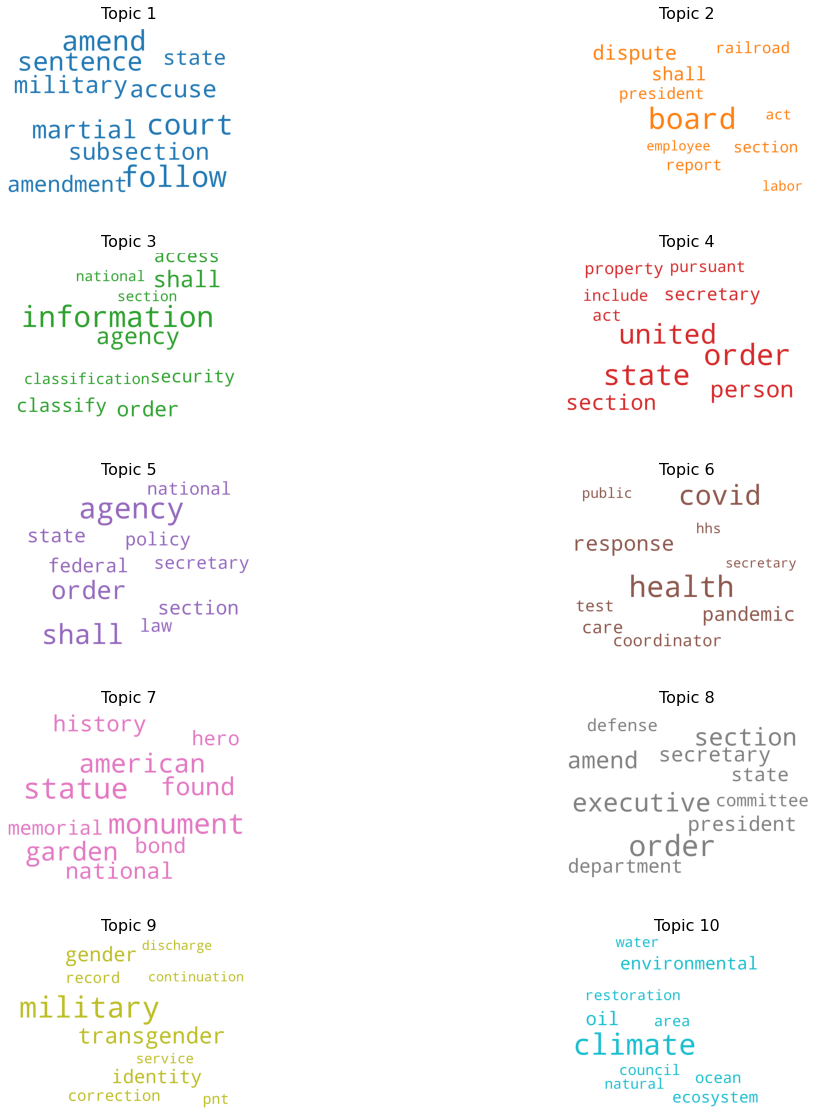

In [132]:
lda_orders_new.generate_topic_wordcloud(ldamodel=best_model)

In [134]:

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from collections import Counter

In [148]:
 def generate_topic_wordcloud(self, ldamodel=None):
        """
        Generate wordcloud using most important words for each topic.
        :param ldamodel: fitted gensim ldamodel
        :type ldamodel: LdaMulticore
        """
        cols = ['#FF0000'] * 20

        cloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=2500,
                          height=1800,
                          max_words=15,
                          colormap='tab10',
                          color_func=lambda *args, **kwargs: cols[i],
                          prefer_horizontal=1.0)
        if ldamodel is None:
            topics = self.best_model.show_topics(formatted=False, num_topics=-1)
        else:
            topics = ldamodel.show_topics(formatted=False, num_topics=-1)

        num_topics = len(topics)
        fig, axes = plt.subplots(num_topics // 2, 2, figsize=(20, 20), sharex='all', sharey='all')

        for i, ax in enumerate(axes.flatten()):
            fig.add_subplot(ax)
            topic_words = dict(topics[i][1])
            cloud.generate_from_frequencies(topic_words, max_font_size=300)
            plt.gca().imshow(cloud)
            plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
            plt.gca().axis('off')
        plt.subplots_adjust(wspace=0, hspace=.3)

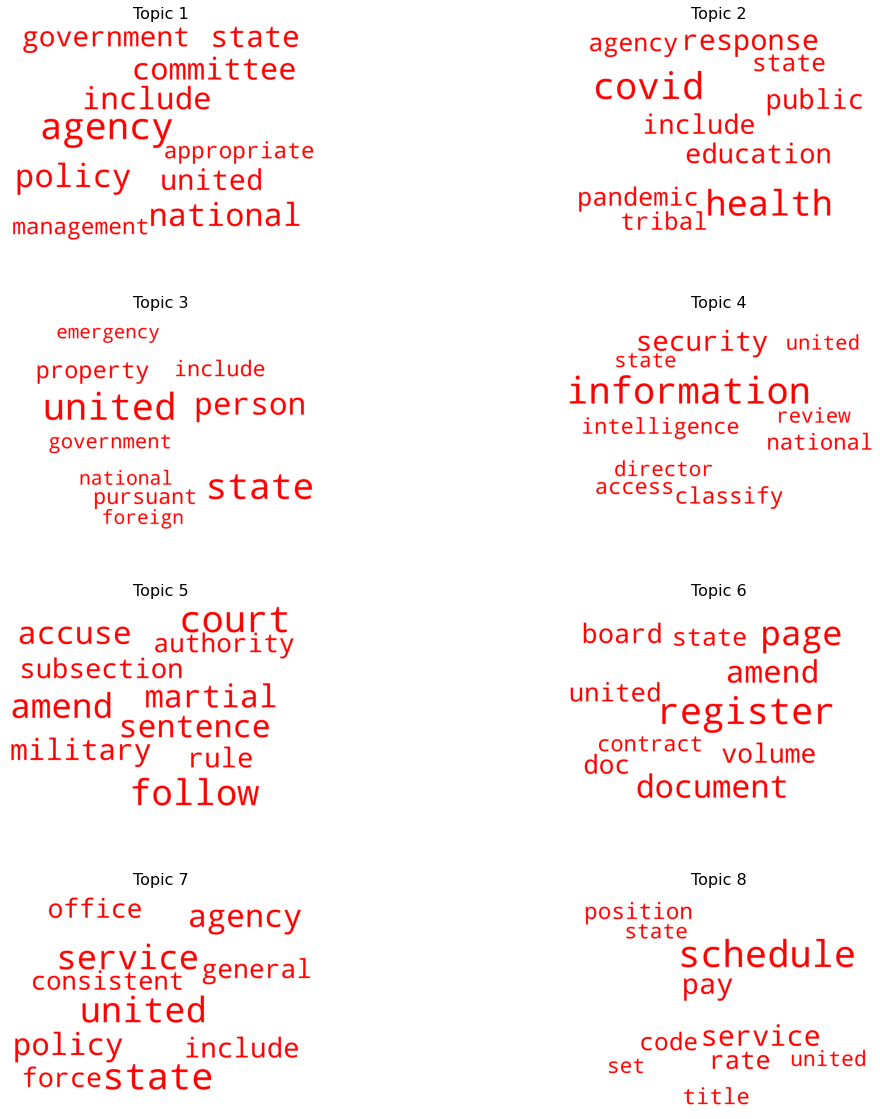

In [181]:
generate_topic_wordcloud(lda_filtered_orders, ldamodel=results_df_filtered.iloc[3, 0])

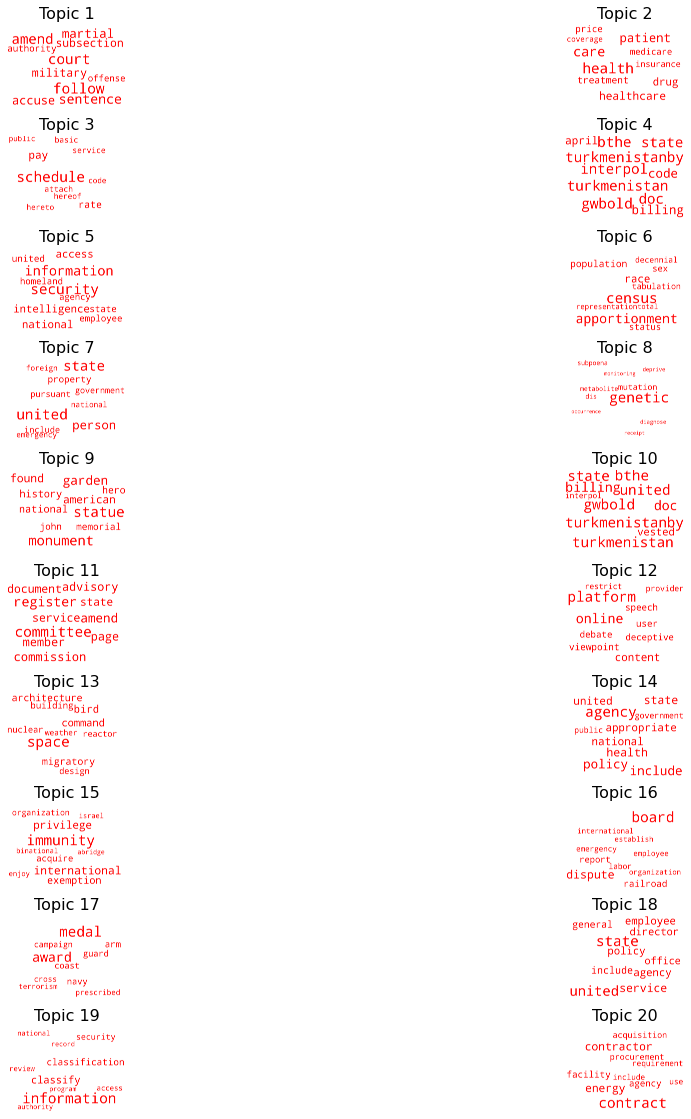

In [172]:
generate_topic_wordcloud(lda_filtered_orders, ldamodel=best_model_filtered)

In [182]:
type(best_model_filtered)

gensim.models.ldamulticore.LdaMulticore

In [248]:
best_model_filtered.show_topic(6, 20)

[('united', 0.03779374),
 ('state', 0.036094263),
 ('person', 0.026845846),
 ('property', 0.013292723),
 ('include', 0.011779453),
 ('pursuant', 0.011222297),
 ('government', 0.011038399),
 ('national', 0.00906003),
 ('emergency', 0.008918724),
 ('foreign', 0.008893175),
 ('term', 0.00756044),
 ('treasury', 0.0073245717),
 ('entity', 0.0072539803),
 ('mean', 0.006823222),
 ('interest', 0.0063393493),
 ('prohibit', 0.005886242),
 ('block', 0.0057062963),
 ('iran', 0.0055197426),
 ('provide', 0.00550065),
 ('determine', 0.005465841)]

In [257]:
best_model_filtered.show_topic(1, 20)

[('health', 0.013983986),
 ('care', 0.012307292),
 ('patient', 0.010147333),
 ('healthcare', 0.008390931),
 ('drug', 0.007702509),
 ('treatment', 0.0059882184),
 ('price', 0.0054785707),
 ('medicare', 0.005112572),
 ('insurance', 0.0046765963),
 ('coverage', 0.003654495),
 ('affordable', 0.0032196066),
 ('provider', 0.0031031189),
 ('american', 0.0030960557),
 ('human', 0.003033692),
 ('aca', 0.0029124396),
 ('clinical', 0.0028994721),
 ('medicaid', 0.0025206928),
 ('disease', 0.0025007494),
 ('million', 0.0023736507),
 ('hospital', 0.0023273437)]

In [259]:
best_model_filtered.show_topic(10, 20)

[('committee', 0.016056828),
 ('register', 0.013762909),
 ('amend', 0.012140781),
 ('commission', 0.011406159),
 ('page', 0.010851958),
 ('member', 0.010841239),
 ('advisory', 0.010544702),
 ('service', 0.010183134),
 ('document', 0.0100271655),
 ('state', 0.009394125),
 ('united', 0.00905888),
 ('house', 0.008435533),
 ('white', 0.008386052),
 ('doc', 0.008279426),
 ('office', 0.007906455),
 ('government', 0.007168658),
 ('provide', 0.0071606347),
 ('volume', 0.0069016013),
 ('function', 0.006633191),
 ('national', 0.00641819)]

In [217]:
results_df_filtered

,Models,alpha,beta,num_topics,coherence_score
41,"LdaModel(num_terms=10214, num_topics=20, decay...",0.8,1,20,0.541976
17,"LdaModel(num_terms=10214, num_topics=20, decay...",0.6,1,20,0.522334
59,"LdaModel(num_terms=10214, num_topics=20, decay...",1,0.8,20,0.521750
80,"LdaModel(num_terms=10214, num_topics=8, decay=...",asymmetric,0.8,8,0.505293
11,"LdaModel(num_terms=10214, num_topics=20, decay...",0.6,0.8,20,0.501721
...,...,...,...,...,...
18,"LdaModel(num_terms=10214, num_topics=4, decay=...",0.6,symmetric,4,0.398297
60,"LdaModel(num_terms=10214, num_topics=4, decay=...",1,1,4,0.396806
78,"LdaModel(num_terms=10214, num_topics=4, decay=...",asymmetric,0.8,4,0.395553
54,"LdaModel(num_terms=10214, num_topics=4, decay=...",1,0.8,4,0.395151


In [221]:
topics_orders = results_df_filtered.iloc[0,0].get_document_topics(bow=lda_filtered_orders.corpus)
for president in exec_orders.president.unique():
    first_order_idx = exec_orders.loc[exec_orders.president == president].first_valid_index()
    print(f"President {president} wrote about {topics_orders[first_order_idx]} in his first order")
    print()

President barack_obama wrote about [(4, 0.8715889), (17, 0.11974609)] in his first order

President george_w_bush wrote about [(4, 0.043298624), (6, 0.14019816), (10, 0.028542856), (13, 0.0533977), (17, 0.6396183)] in his first order

President william_j_clinton wrote about [(0, 0.01041028), (4, 0.2416728), (10, 0.011652632), (17, 0.6416603), (18, 0.03689997)] in his first order

President donald_trump wrote about [(1, 0.015170408), (10, 0.03250239), (13, 0.04827929), (17, 0.7199487), (19, 0.092918396)] in his first order

President joe_biden wrote about [(13, 0.9797571)] in his first order



In [229]:
topics_orders[0]

[(4, 0.8715854), (17, 0.119759515)]

## Dominant topics

The following code finds the dominant topic for each document and plots the topic distribution for each president.

In [226]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_model_filtered, 
                                                  corpus=lda_filtered_orders.corpus, 
                                                  texts=lda_filtered_orders.clean_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.8716,"security, information, national, intelligence,...","[title, january, amend, civil, service, rule, ..."
1,1,17.0,0.8827,"state, united, service, agency, employee, poli...","[january, provide, succession, justiceby, auth..."
2,2,17.0,0.7311,"state, united, service, agency, employee, poli...","[january, provide, succession, environmental, ..."
3,3,6.0,0.5335,"united, state, person, property, include, purs...","[title, january, recognize, positive, action, ..."
4,4,6.0,0.2698,"united, state, person, property, include, purs...","[title, january, amend, update, eligibility, c..."
5,5,17.0,0.5703,"state, united, service, agency, employee, poli...","[january, designate, world, organisation, anim..."
6,6,12.0,0.3444,"space, bird, command, migratory, architecture,...","[january, exclusion, labor, management, relati..."
7,7,6.0,0.8656,"united, state, person, property, include, purs...","[title, december, take, additional, step, addr..."
8,8,17.0,0.8856,"state, united, service, agency, employee, poli...","[title, december, provide, succession, laborby..."
9,9,2.0,0.9089,"schedule, pay, rate, attach, service, basic, h...","[title, december, adjustment, certain, rate, p..."


In [250]:
topics_mapping = {0.0: 'military procedures',
                 1.0: 'health insurance',
                 2.0: 'payment systems',
                 3.0: 'international crime',
                 4.0: 'national security',
                 5.0: 'census',
                 6.0: 'crisis',
                 7.0: 'biology',
                 8.0: 'monuments',
                 9.0: 'international crime',
                 10.0: 'governmental bureaucracy',
                 11.0: 'internet regulation',
                 12.0: 'space',
                 13.0: 'public health',
                 14.0: 'foreign diplomacy',
                 15.0: 'labor',
                 16.0: 'military honors',
                 17.0: 'people in authority',
                 18.0: 'national security',
                 19.0: 'energy production'}

In [234]:
df_dominant_topic = df_dominant_topic.join(exec_orders['president']).join(exec_orders['title'])

In [252]:
df_dominant_topic['topic_name'] = df_dominant_topic.Dominant_Topic.map(topics_mapping)

<AxesSubplot:title={'center':'Obama Topic Distribution'}>

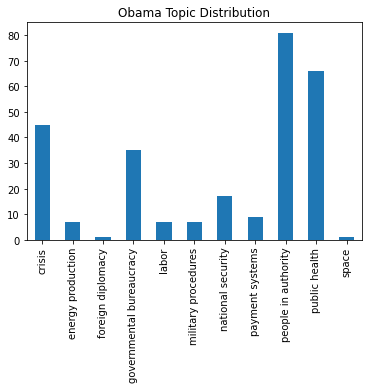

In [263]:
obama = df_dominant_topic[df_dominant_topic.president=="barack_obama"]
obama.groupby('topic_name').count()['title'].plot(kind='bar', title='Obama Topic Distribution', xlabel='')

<AxesSubplot:title={'center':'Trump Topic Distribution'}>

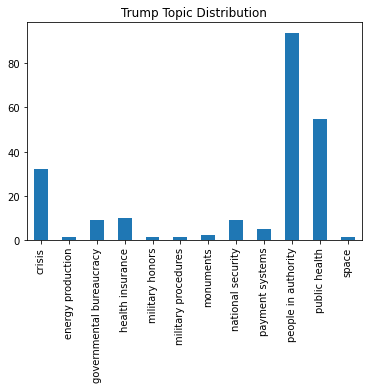

In [264]:
trump = df_dominant_topic[df_dominant_topic.president=="donald_trump"]
trump.groupby('topic_name').count()['title'].plot(kind='bar', title='Trump Topic Distribution', xlabel='')

<AxesSubplot:title={'center':'Bush Topic Distribution'}>

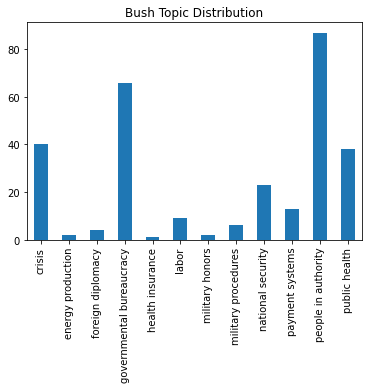

In [265]:
bush = df_dominant_topic[df_dominant_topic.president=="george_w_bush"]
bush.groupby('topic_name').count()['title'].plot(kind='bar', title='Bush Topic Distribution', xlabel='')

<AxesSubplot:title={'center':'Clinton Topic Distribution'}>

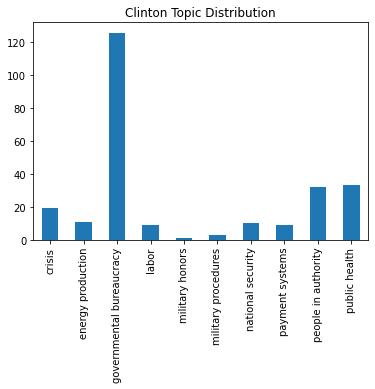

In [266]:
clinton = df_dominant_topic[df_dominant_topic.president=="william_j_clinton"]
clinton.groupby('topic_name').count()['title'].plot(kind='bar', title='Clinton Topic Distribution', xlabel='')

<AxesSubplot:title={'center':'Biden Topic Distribution'}>

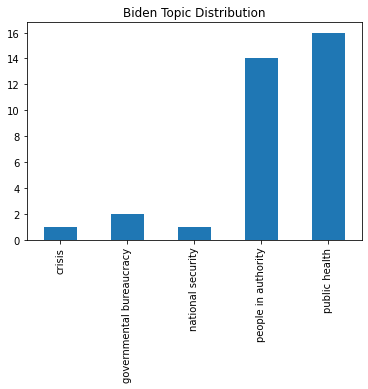

In [267]:
biden = df_dominant_topic[df_dominant_topic.president=="joe_biden"]
biden.groupby('topic_name').count()['title'].plot(kind='bar', title='Biden Topic Distribution', xlabel='')

In [239]:
df_dominant_topic.groupby(['Dominant_Topic', 'president']).count()

Document_No  Topic_Perc_Contrib  Keywords  \
Dominant_Topic president                                                      
0.0            barack_obama                 7                   7         7   
               donald_trump                 1                   1         1   
               george_w_bush                6                   6         6   
               william_j_clinton            3                   3         3   
1.0            donald_trump                10                  10        10   
               george_w_bush                1                   1         1   
2.0            barack_obama                 9                   9         9   
               donald_trump                 5                   5         5   
               george_w_bush               13                  13        13   
               william_j_clinton            9                   9         9   
4.0            barack_obama                15                  15        15   
               donald_trump                 9                   9         9   
               george_w_bush               21                  21        21   
               joe_biden                    1                   1         1   
               william_j_clinton            8                   8         8   
6.0            barack_obama                45                  45        45   
               donald_trump                32                  32        32   
               george_w_bush               40                  40        40   
               joe_biden                    1                   1         1   
               william_j_clinton           19                  19        19   
8.0            donald_trump                 2                   2         2   
10.0           barack_obama                35                  35        35   
               donald_trump                 9                   9         9   
               george_w_bush               66                  66        66   
               joe_biden                    2                   2         2   
               william_j_clinton          126                 126       126   
12.0           barack_obama                 1                   1         1   
               donald_trump                 1                   1         1   
13.0           barack_obama                66                  66        66   
               donald_trump                55                  55        55   
               george_w_bush               38                  38        38   
               joe_biden                   16                  16        16   
               william_j_clinton           33                  33        33   
14.0           barack_obama                 1                   1         1   
               george_w_bush                4                   4         4   
15.0           barack_obama                 7                   7         7   
               george_w_bush                9                   9         9   
               william_j_clinton            9                   9         9   
16.0           donald_trump                 1                   1         1   
               george_w_bush                2                   2         2   
               william_j_clinton            1                   1         1   
17.0           barack_obama                81                  81        81   
               donald_trump                94                  94        94   
               george_w_bush               87                  87        87   
               joe_biden                   14                  14        14   
               william_j_clinton           32                  32        32   
18.0           barack_obama                 2                   2         2   
               george_w_bush                2                   2         2   
               william_j_clinton            2                   2         2   
19.0 

Below are a few more wordclouds produced by various model specifications.

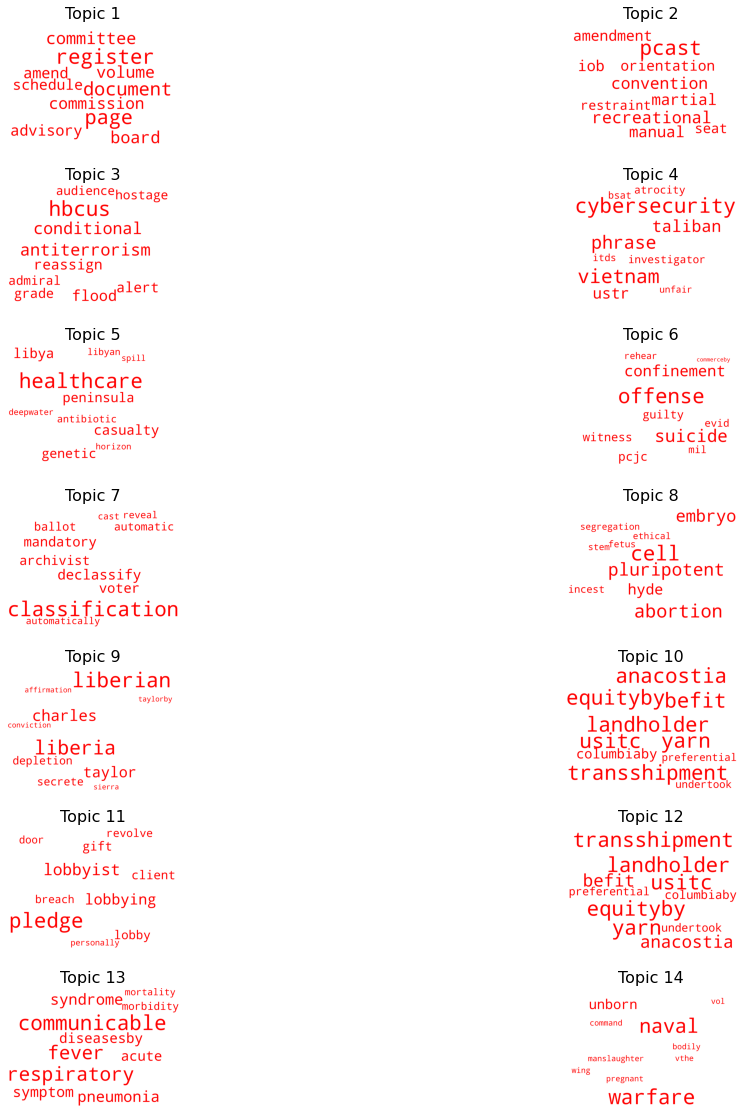

In [168]:
generate_topic_wordcloud(lda_filtered_orders, ldamodel=lda_orders_15)

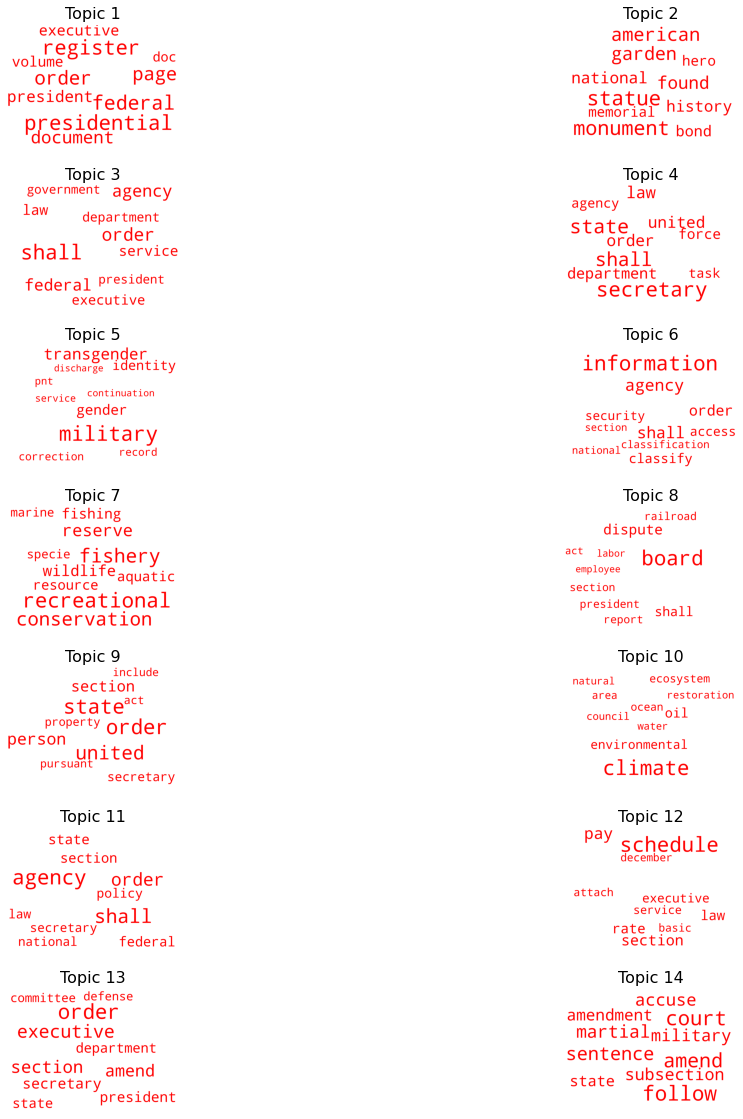

In [149]:
generate_topic_wordcloud(lda_orders, ldamodel=best_model)

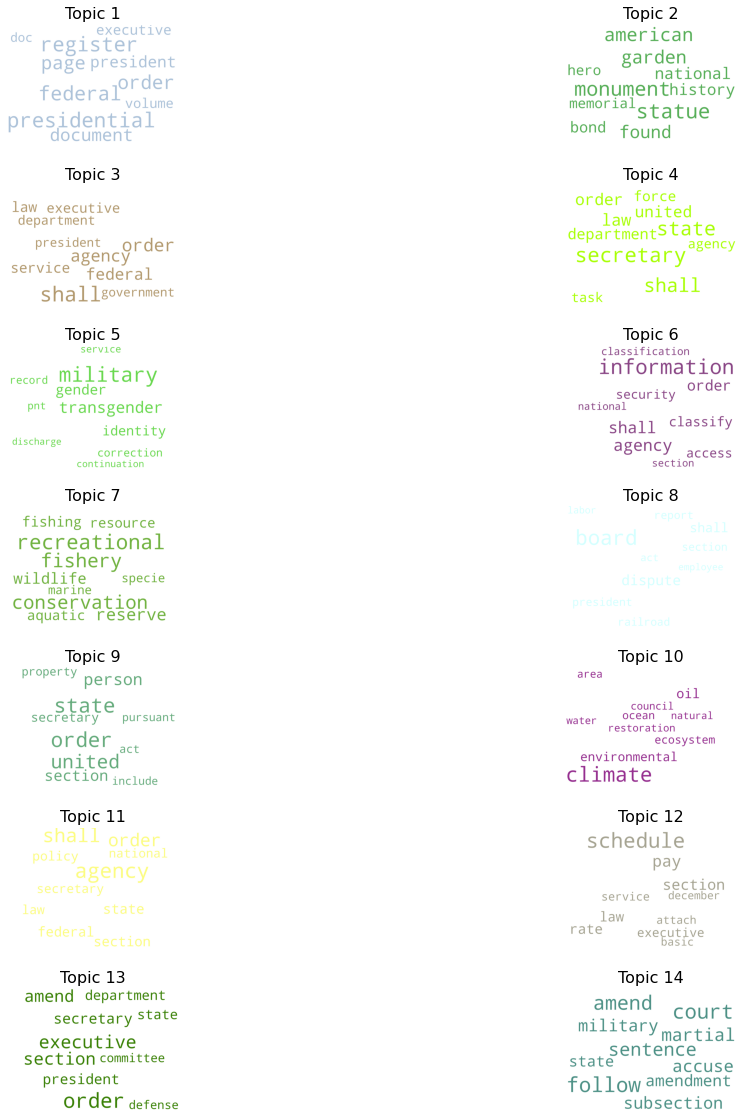

In [142]:
generate_topic_wordcloud(lda_orders, ldamodel=best_model)

In [80]:
results_df.iloc[0]

Models             LdaModel(num_terms=10227, num_topics=15, decay...
alpha                                                              1
beta                                                             0.8
num_topics                                                        15
coherence_score                                             0.529558
Name: 58, dtype: object

## Topic distribution by president

Below are the distribution of topics across orders for each president. For the sake of visualization, I also selected 10 orders at random from each president and plotted the distribtuion of topics within those orders.

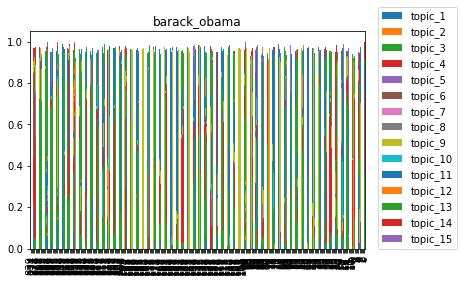

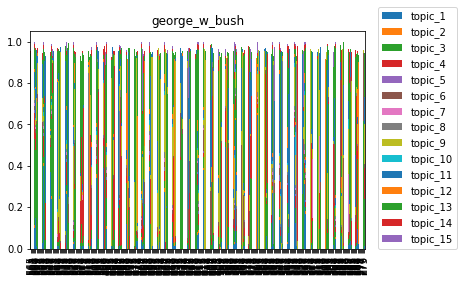

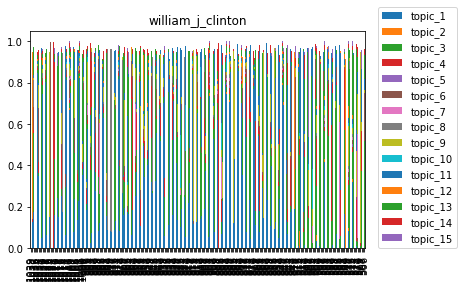

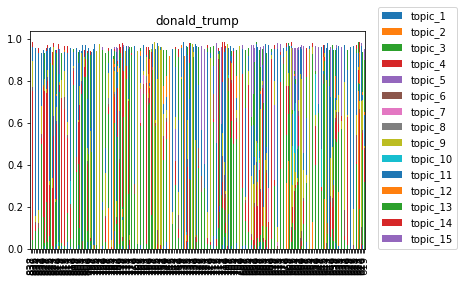

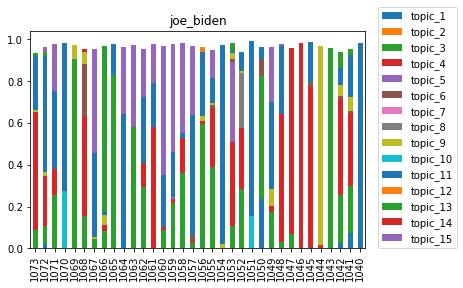

In [56]:
for president in exec_orders.president.unique():
    order_idx = exec_orders.loc[exec_orders.president == president].index.tolist()
    order_idx.reverse()
    lda_orders.generate_bar_plot(ldamodel=results_df.iloc[0,0], 
                                 docs_to_view=order_idx, title=president)

In [81]:
import random

In [ ]:
for president in exec_orders.president.unique():
    order_idx = exec_orders.loc[exec_orders.president == president].index.tolist()
    order_idx.reverse()
    order_idx = random.sample(order_idx, 10) # randomly sample 10 from the list to plot
    lda_orders.generate_bar_plot(ldamodel=results_df_filtered.iloc[0,0], 
                                 docs_to_view=order_idx, title=president)

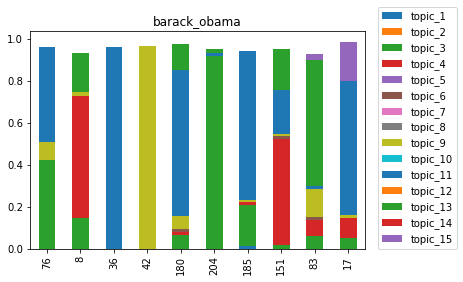

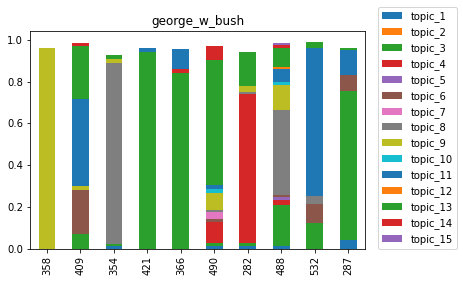

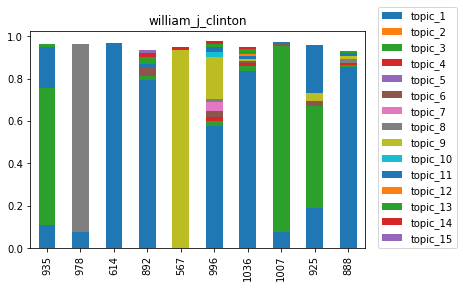

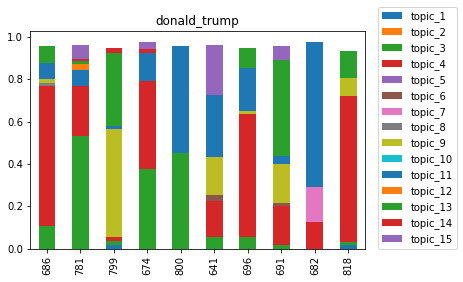

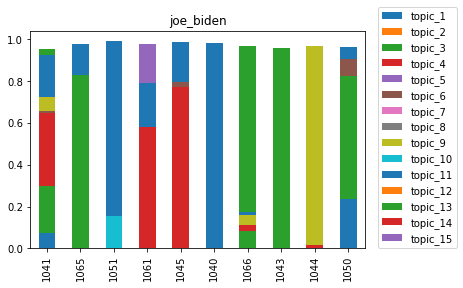

In [82]:
for president in exec_orders.president.unique():
    order_idx = exec_orders.loc[exec_orders.president == president].index.tolist()
    order_idx.reverse()
    order_idx = random.sample(order_idx, 10) # randomly sample 10 from the list to plot
    lda_orders.generate_bar_plot(ldamodel=results_df.iloc[0,0], 
                                 docs_to_view=order_idx, title=president)

## Word embeddings by party

I used word2vec to see how climate-related speech varied between Democratic and Repbulican presidents in terms of associated words and sentiment scores.

In [60]:
party_affiliation = {'barack_obama': 'Democrat',
                    'george_w_bush': 'Republican',
                    'william_j_clinton': 'Democrat',
                    'donald_trump': 'Republican',
                    'joe_biden': 'Democrat'}

In [61]:
#exec_orders['tokenized_sentences'] = exec_orders['clean_text'].apply()
exec_orders['tokenized_sentences'] = exec_orders['clean_text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
exec_orders['normalized_sentences'] = exec_orders['tokenized_sentences'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [62]:
exec_orders["Party"] = exec_orders.president.apply(lambda row: party_affiliation[row])

In [63]:
democrats = exec_orders.loc[exec_orders.Party=="Democrat", :]
republicans = exec_orders.loc[exec_orders.Party=="Republican", :]

In [64]:
democratsW2V  = gensim.models.word2vec.Word2Vec(democrats['normalized_sentences'].sum(),window=10)
republicansW2V = gensim.models.word2vec.Word2Vec(republicans['normalized_sentences'].sum(),window=10)

In [65]:
words_of_interest = ["climate", "energy", "environment", "fuel",
                     "pollution", "emissions", "clean", "coal", "oil", "carbon"]

for word in words_of_interest:
    print()
    print(f"Finding words most similar to '{word}' according to its embedding")
    try:
        print("................................................................")
        print("Based on Republican embedding:")
        rep_words_tupple = republicansW2V.most_similar(word)
        rep_words = [word for word, score in rep_words_tupple]
        print(rep_words_tupple)
        sentiment = SentimentScorer.polarity_scores(" ".join(rep_words))
        print(f"Sentiment {sentiment['compound']}")
        print()
        print("Based on Democrats embedding:")
        dem_words_tupple = democratsW2V.most_similar(word)
        dem_words = [word for word, score in dem_words_tupple]
        sentiment_dem = SentimentScorer.polarity_scores(" ".join(dem_words))
        print(dem_words_tupple)
        print(f"Sentiment {sentiment_dem['compound']}")
        print()
        print()
    except:
        continue


Finding words most similar to 'climate' according to its embedding
................................................................
Based on Republican embedding:
[('conference', 0.8943452835083008), ('launch', 0.8908724784851074), ('pollution', 0.8903526067733765), ('scalable', 0.8880280256271362), ('tree', 0.8840777277946472), ('suppression', 0.8813032507896423), ('modernize', 0.8777592182159424), ('mathematics', 0.8740977048873901), ('rehabilitation', 0.8734374046325684), ('methane', 0.8698295950889587)]

Finding words most similar to 'energy' according to its embedding
................................................................
Based on Republican embedding:
[('water', 0.8207719326019287), ('forecast', 0.7985769510269165), ('transportation', 0.7932743430137634), ('infrastructure', 0.7524186372756958), ('protection', 0.7504978775978088), ('development', 0.7432593703269958), ('analysis', 0.7362589836120605), ('production', 0.7324534058570862), ('technology', 0.7274103164672852)

In [70]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [72]:
SentimentScorer = SentimentIntensityAnalyzer()


In [74]:
words_of_interest = ["climate", "energy", "environment", "fuel",
                     "pollution", "clean", "coal", "oil", "carbon"]

for word in words_of_interest:
    print()
    print(f"Finding words most similar to '{word}' according to its embedding")

    print("................................................................")
    print("Based on Republican embedding:")
    rep_words_tupple = republicansW2V.most_similar(word)
    rep_words = [word for word, score in rep_words_tupple]
    print(rep_words_tupple)
    sentiment = SentimentScorer.polarity_scores(" ".join(rep_words))
    print(f"Sentiment {sentiment['compound']}")
    print()
    print("Based on Democrats embedding:")
    dem_words_tupple = democratsW2V.most_similar(word)
    dem_words = [word for word, score in dem_words_tupple]
    sentiment_dem = SentimentScorer.polarity_scores(" ".join(dem_words))
    print(dem_words_tupple)
    print(f"Sentiment {sentiment_dem['compound']}")
    print()
    print()



Finding words most similar to 'climate' according to its embedding
................................................................
Based on Republican embedding:
[('conference', 0.8943452835083008), ('launch', 0.8908724784851074), ('pollution', 0.8903526067733765), ('scalable', 0.8880280256271362), ('tree', 0.8840777277946472), ('suppression', 0.8813032507896423), ('modernize', 0.8777592182159424), ('mathematics', 0.8740977048873901), ('rehabilitation', 0.8734374046325684), ('methane', 0.8698295950889587)]
Sentiment 0.0

Based on Democrats embedding:
[('resilience', 0.9037756323814392), ('recovery', 0.8940604329109192), ('preparedness', 0.8935171365737915), ('impact', 0.8832716941833496), ('restoration', 0.8827733993530273), ('atrocity', 0.8821969628334045), ('arctic', 0.8720663785934448), ('respond', 0.8667030930519104), ('ecosystem', 0.8601714372634888), ('ocean', 0.8590062856674194)]
Sentiment 0.0



Finding words most similar to 'energy' according to its embedding
...............

## Doc2Vec

I used a doc2vec model to see how executive orders mapped onto various keywords.

In [106]:
keywords = ['energy', 'environment', 'education', 'labor', 'employment', 'health', 
            'healthcare', 'defense', 'security', 'war']

In [107]:
taggedDocs = []
for index, row in exec_orders.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_tokens']]
    #docKeywords.append(row['signing_date'])
    docKeywords.append(row['title']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_tokens'], tags = docKeywords))
exec_orders['TaggedOrders'] = taggedDocs

In [108]:
exec_D2V = gensim.models.doc2vec.Doc2Vec(exec_orders['TaggedOrders'], size = 100) #Limiting to 100 dimensions

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


An analogy: energy is to renewable as healthcare is to...

In [109]:
exec_D2V.most_similar(positive = ['energy','healthcare'], negative = ['renewable'])

[('aapis', 0.7390325665473938),
 ('quality', 0.7374128699302673),
 ('era', 0.7253649234771729),
 ('creativity', 0.7147077322006226),
 ('productivity', 0.7087218761444092),
 ('care', 0.7064564824104309),
 ('sustainable', 0.6880221366882324),
 ('constrain', 0.6865764856338501),
 ('rural', 0.6828758120536804),
 ('medicaid', 0.681040346622467)]

An analogy: cut is to tax as increase is to...

In [111]:
exec_D2V.most_similar(positive = ['cut','increase'], negative = ['tax'])

[('drive', 0.8394268751144409),
 ('continuously', 0.839030385017395),
 ('wildland', 0.8367905616760254),
 ('deployment', 0.8238936066627502),
 ('sustainable', 0.815136194229126),
 ('entrepreneur', 0.8052852153778076),
 ('enterprise', 0.7951325178146362),
 ('scalable', 0.779407799243927),
 ('productivity', 0.7790278196334839),
 ('locally', 0.776972770690918)]

In [112]:
sklearn.metrics.pairwise.cosine_similarity(exec_D2V['committee'].reshape(1,-1), exec_D2V['board'].reshape(1,-1))

array([[0.58093625]], dtype=float32)

As a proof of concept, I looked at the similarity between "committee" and "board," which was relatively high. I then looked at the orders that exhibited the greatest similarity in embeddings to various keywords.

In [113]:
exec_D2V.docvecs.most_similar([exec_D2V['energy'] ], topn=5 )

[('Federal Leadership in Environmental, Energy, and Economic Performance',
  0.6493438482284546),
 ("Promoting Active Management of America's Forests, Rangelands, and Other Federal Lands To Improve Conditions and Reduce Wildfire Risk",
  0.6395925879478455),
 ('Strengthening Surface Transportation Security', 0.626785397529602),
 ('Greening the Government Through Efficient Energy Management',
  0.591312050819397),
 ('energy', 0.551226019859314)]

In [114]:
exec_D2V.docvecs.most_similar([exec_D2V['job'] ], topn=5 )

[('Access to Affordable Life-Saving Medications', 0.6769315004348755),
 ('Building the National Garden of American Heroes', 0.659661054611206),
 ('Amendment to Executive Order 13125, Increasing Participation of Asian Americans and Pacific Islanders in Federal Programs',
  0.65581214427948),
 ('Exemption From Executive Order 13658 for Recreational Services on Federal Lands',
  0.6527481079101562),
 ('Federal Workforce Transportation', 0.6330221891403198)]

In [280]:
exec_D2V.docvecs.most_similar([exec_D2V['tax'] ], topn=5 )

[('Steps to Increase Competition and Better Inform Consumers and Workers to Support Continued Growth of the American Economy',
  0.8163976669311523),
 ('Energy Efficient Standby Power Devices', 0.8144713640213013),
 ('Strengthening Buy-American Preferences for Infrastructure Projects',
  0.801712155342102),
 ('Improving Regulation and Regulatory Review', 0.7888995409011841),
 ('Ensuring Enforcement and Implementation of Abortion Restrictions in the Patient Protection and Affordable Care Act',
  0.767268717288971)]

In [271]:
exec_D2V.docvecs.most_similar([exec_D2V['labor'] ], topn=5 )

[('Amending the Order of Succession in the Department of Homeland Security',
  0.5923480987548828),
 ('Providing an Order of Succession Within the Department of Agriculture',
  0.5514638423919678),
 ('Providing an Order of Succession Within the Department of Defense',
  0.5331659317016602),
 ('labor', 0.523872971534729),
 ('Establishing an Emergency Board To Investigate Disputes Between Metro North Commuter Railroad and Its Employees Represented by Certain Labor Organizations',
  0.5150375366210938)]

In [115]:
exec_D2V.docvecs.most_similar([exec_D2V['medicare'] ], topn=5 )

[('Access to Affordable Life-Saving Medications', 0.8631265759468079),
 ('An America-First Healthcare Plan', 0.8220252990722656),
 ('Lowering Prices for Patients by Eliminating Kickbacks to Middlemen',
  0.8165398836135864),
 ('Reforming Our Incarceration System To Eliminate the Use of Privately Operated Criminal Detention Facilities',
  0.7563331127166748),
 ('Advancing American Kidney Health', 0.748867392539978)]

In [273]:
exec_D2V.docvecs.most_similar([exec_D2V['sustainable'] ], topn=5 )

[('Establishment of Great Lakes Interagency Task Force and Promotion of a Regional Collaboration of National Significance for the Great Lakes',
  0.7779827117919922),
 ('Encouraging International Support for the Recovery and Use of Space Resources',
  0.7536429166793823),
 ('Recreational Fisheries', 0.7481898069381714),
 ('A Federal Strategy To Ensure Secure and Reliable Supplies of Critical Minerals',
  0.7208641767501831),
 ("Promoting Active Management of America's Forests, Rangelands, and Other Federal Lands To Improve Conditions and Reduce Wildfire Risk",
  0.6888903975486755)]

I then examined words that came up as having the most similar embeddings to a few different executive orders.

In [116]:
exec_D2V.most_similar([exec_D2V.docvecs['Access to Affordable Life-Saving Medications']], topn=5)

[('epinephrine', 0.9319689273834229),
 ('price', 0.8956791162490845),
 ('low', 0.8886064291000366),
 ('injectable', 0.8707404136657715),
 ('medicare', 0.8631266355514526)]

In [117]:
exec_D2V.most_similar([exec_D2V.docvecs['A Federal Strategy To Ensure Secure and Reliable Supplies of Critical Minerals']], topn=5)

[('creativity', 0.7915143966674805),
 ('lake', 0.7416248321533203),
 ('impact', 0.7295975089073181),
 ('rebuild', 0.7244806289672852),
 ('sustainable', 0.7208640575408936)]

In [286]:
exec_D2V.most_similar([exec_D2V.docvecs['Combating Race and Sex Stereotyping']], topn=5)

[('contractor', 0.7118039131164551),
 ('employee', 0.6772301197052002),
 ('employment', 0.6699382662773132),
 ('position', 0.6443567872047424),
 ('appointee', 0.6361402869224548)]

In [289]:
exec_D2V.most_similar([exec_D2V.docvecs['Establishing a Community Solutions Council']], topn=5)

[('attend', 0.8277484178543091),
 ('representation', 0.7807494401931763),
 ('partnership', 0.7804417610168457),
 ('diverse', 0.7767810821533203),
 ('patriotic', 0.7673345804214478)]

In [287]:
exec_D2V.most_similar([exec_D2V.docvecs['Rebuilding and Enhancing Programs To Resettle Refugees and Planning for the Impact of Climate Change on Migration']], topn=5)

[('usrap', 0.710616946220398),
 ('deficiency', 0.6490450501441956),
 ('aggressive', 0.6469368934631348),
 ('refugee', 0.6462225914001465),
 ('crucial', 0.6456719636917114)]

In [118]:
exec_D2V.docvecs.most_similar([exec_D2V['land']+exec_D2V['protect']+exec_D2V['water'] ], topn=5 )

[('Encouraging International Support for the Recovery and Use of Space Resources',
  0.7656775712966919),
 ("Promoting Active Management of America's Forests, Rangelands, and Other Federal Lands To Improve Conditions and Reduce Wildfire Risk",
  0.7625375390052795),
 ('Trails for America in the 21st Century', 0.7213295698165894),
 ('Management and General Public Use of the National Wildlife Refuge System',
  0.721288800239563),
 ('Gulf Coast Ecosystem Restoration', 0.6190264225006104)]

I plotted the similarity of the keyword embeddings as a heat map.

In [119]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = exec_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, exec_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

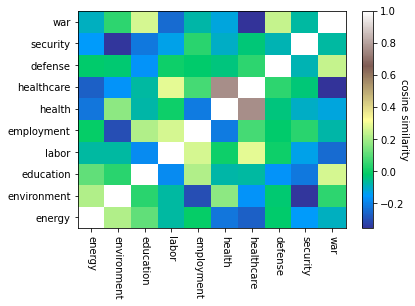

In [120]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

In [121]:
targetDocs = exec_orders['title'].sample(10, random_state=1)

I looked at the cosine similarity between 10 randomly selected executive orders. Not surprisingly, they tend to be relatively similar to one another.

In [122]:
heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = exec_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, exec_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

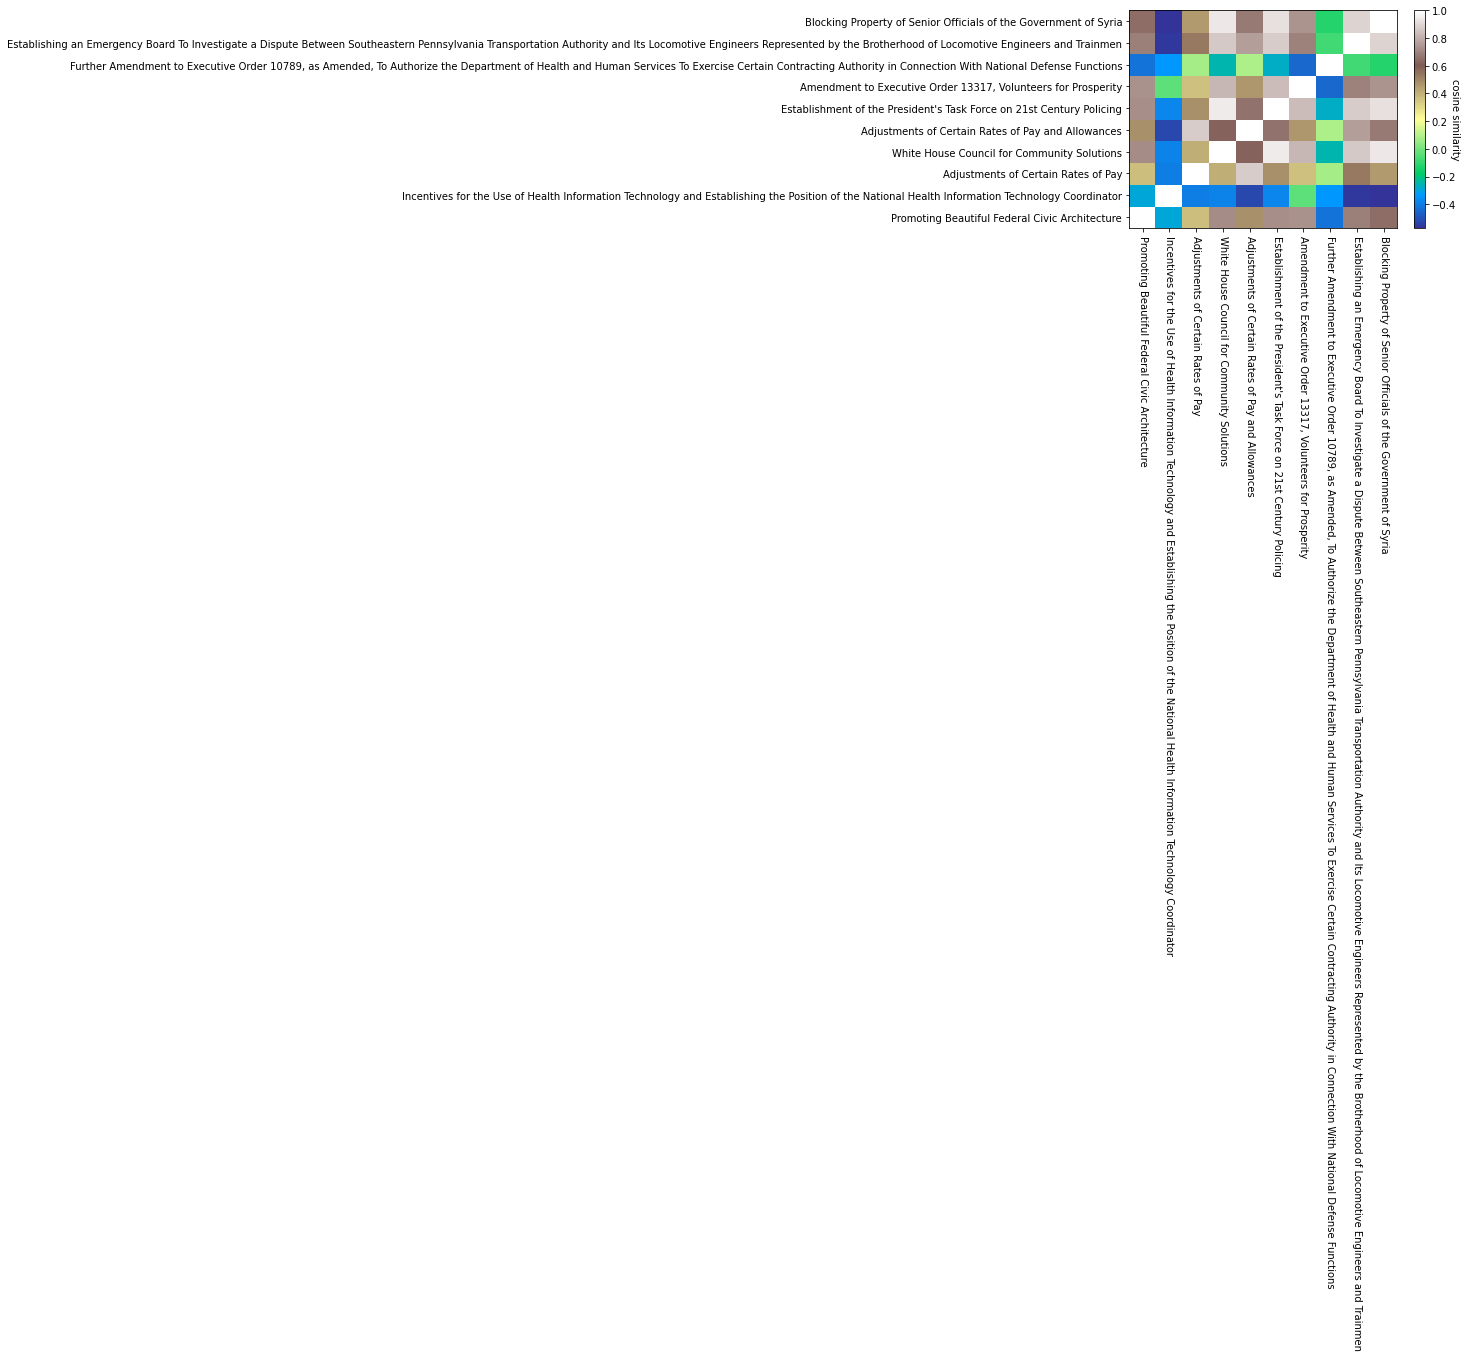

In [123]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [124]:
# heatmap of similarity between those 10 random docs and my keywords
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = exec_D2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, exec_D2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

Finally, I looked at how those same 10 randomly selected executive orders mapped onto our set of keywords.

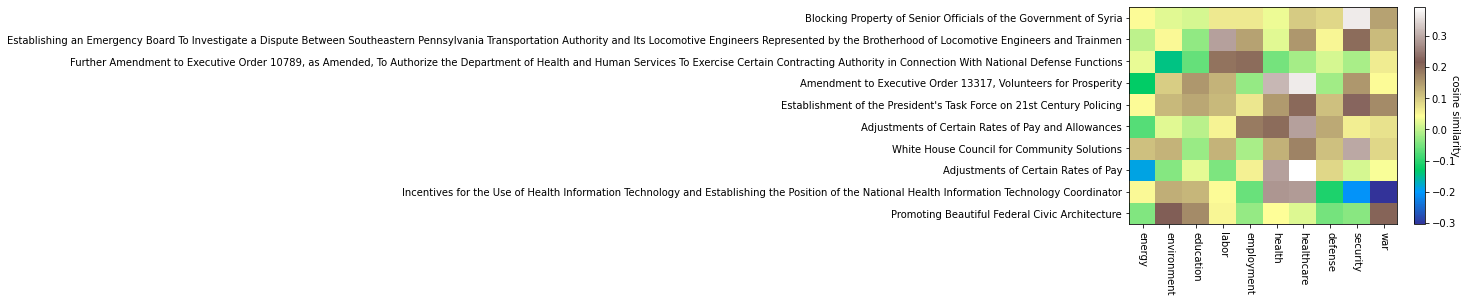

In [125]:
fig, ax = plt.subplots()
#fig = plt.figure(figsize = (20,12))
#ax = fig.add_subplot(111)
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

In [126]:
exec_D2V.save('exec_D2V')